# Scaffold analysis
- zobenceni / znazorneni strukturnich prvku
- cela rada
- odstraneni postrannich retezcu, zjednoduseni heteroatomu na uhliky
- = skelet
- vetsina struktur se sklada z kruhu -> slouceni struktur dohromady podle spolecneho jadra
- naimplementovane v rdkitu 

In [4]:
from rdkit.Chem import AllChem as Chem 
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 

from rdkit.Chem.Scaffolds import MurckoScaffold

In [3]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in suppl if m]pick

RDKit WARNING: [15:12:36]  S group DAT ignored on line 2516
RDKit WARNING: [15:12:36]  S group DAT ignored on line 2516
RDKit WARNING: [15:12:36]  S group DAT ignored on line 2516
RDKit WARNING: [15:12:36]  S group DAT ignored on line 2516
RDKit WARNING: [15:12:37]  S group DAT ignored on line 15552
RDKit WARNING: [15:12:37]  S group DAT ignored on line 15552
RDKit WARNING: [15:12:37]  S group DAT ignored on line 15552
RDKit WARNING: [15:12:37]  S group DAT ignored on line 15552
RDKit ERROR: [15:12:37] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:12:37] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [15:12:37] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:12:37] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:12:38]  S group GEN ignored on line 102860
RDKit ERROR: [15:12:37] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:12:39]  Unhand

RDKit ERROR: [15:12:42] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [15:12:42] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:12:42] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [15:12:42] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:12:42] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [15:12:42] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [15:12:42] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [15:12:42] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [15:12:42] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [15:12:42] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [15:12:42] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [15:12:45] ERROR: Explicit valence for atom # 4 F, 2, is greater than permitted
RDKit ERROR: [15:12:45] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:12:45] ERROR: Could not sanitize molecule ending on line 659994
RDKit ERROR: [15:12:45] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:12:46]  Unhandled CTAB feature: S group SRU on line: 754017. Molecule skipped.
RDKit ERROR: [15:12:47] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [15:12:47] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [15:12:47] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [15:12:49]  Unhandled CTAB feature: S group SRU on line: 1148513. Molecule skipped.
RDKit ERROR: [15:12:49] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [15:12:49] ERROR: Could not sanitize molecule ending on line 1151592


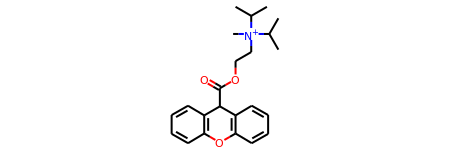

In [5]:
m = drugbank[666]
m

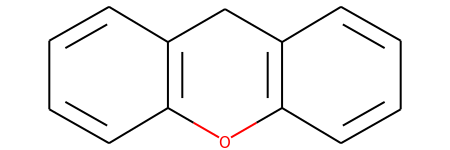

In [6]:
#odsektuny postranni retezec a nechalo to heteroatom
MurckoScaffold.GetScaffoldForMol(m)

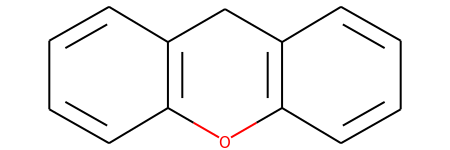

In [8]:
scaffold1 = MurckoScaffold.GetScaffoldForMol(m)
scaffold1

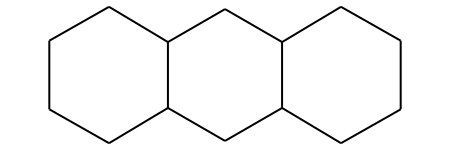

In [11]:
#bez dvojnych vazeb a heteroatomu:
scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
scaffold2

#framework = uhlik ne jako atom, ale jako uzel

### Ukol 1: Nalezeni nejcastejsiho scaffoldu v drugbank
- pouzijeme kanonicky smiles pro ulozeni
    - stejna molekula nemusi mit stejny smiles
- ty nejpodrobnejsi scaffoldy
- nekteri do scaffoldu yahrnuji atomy navazane dvojnou vazbou -> nutno napsat, jak to chci

In [15]:
scaffolds2count = {}
for mol in drugbank:
    Chem.rdmolops.RemoveStereochemistry(mol) #odebrani stereochemie
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    smiles = Chem.MolToSmiles(scaffold)
    scaffolds2count[smiles] = scaffolds2count.get(smiles, 0) + 1

In [16]:
len(scaffolds2count)

3248

In [17]:
scaffolds2count

{'O=C(CNC(=O)CNC(=O)C1CCCN1C(=O)CNC(=O)CNC(=O)CNC(=O)C(Cc1ccccc1)NC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)C1CCCN1C(=O)CNC(=O)C1CCCN1C(=O)CCc1ccccc1)NCCc1ccccc1': 2,
 'O=C(CNC(=O)CNC(=O)C(Cc1ccccc1)NC(=O)CNC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)C(Cc1cnc[nH]1)NC(=O)C1CCC(=O)N1)NCC(=O)N1CCCC1': 2,
 'O=C1CNC(=O)C(Cc2ccccc2)NC(=O)C(Cc2ccccc2)NC(=O)CCSSCC(C(=O)N2CCCC2)NC(=O)CN1': 3,
 'O=C(CNC(=O)CNC(=O)C(Cc1ccccc1)NC(=O)CNC(=O)C(Cc1cccnc1)NC(=O)C(Cc1ccccc1)NC(=O)CCc1ccc2ccccc2c1)NCC(=O)N1CCCC1': 2,
 'O=C1CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CN1': 1,
 'O=C1CNC(=O)CNC(=O)C(Cc2c[nH]c3ccccc23)NC(=O)C(Cc2ccccc2)NC(=O)C(NC(=O)CCc2ccccc2)CSSCCN1': 1,
 'c1ccncc1': 46,
 'O=C1CCC2CC3C4CCC5=N4~[Co]46(N3C2=CC2=N~4C(=CC3=N~6C(=C5)CC3)CC2)~n2cn(c3ccccc32)C2CC(CO2)O[PH](=O)OCCN1': 1,
 'O=c1nc[nH]c2c1NC(CNc1ccccc1)CN2': 4,
 'c1c[nH]cn1': 17,
 'c1ncc2ncn(C3CCCO3)c2n1': 101,
 '': 982,
 'c1ccccc1': 637,
 'O=C1NC2CSCC2N1': 6,
 'O=C1C=CCO1': 1,
 'C=C1CCCCC1=CC=C1CCCC2CCCC12

In [18]:
scaffold_smiles = sorted(scaffolds2count.items(), key=lambda x: x[1], reverse=True)

In [19]:
scaffold_smiles[:10]

[('', 982),
 ('c1ccccc1', 637),
 ('C1CCOCC1', 131),
 ('c1ncc2ncn(C3CCCO3)c2n1', 101),
 ('c1ccc2ccccc2c1', 49),
 ('c1ccc2[nH]ccc2c1', 47),
 ('c1ccncc1', 46),
 ('O=c1ccn(C2CCCO2)c(=O)[nH]1', 46),
 ('C1CCCCC1', 46),
 ('c1ccc(-c2ccccc2)cc1', 44)]

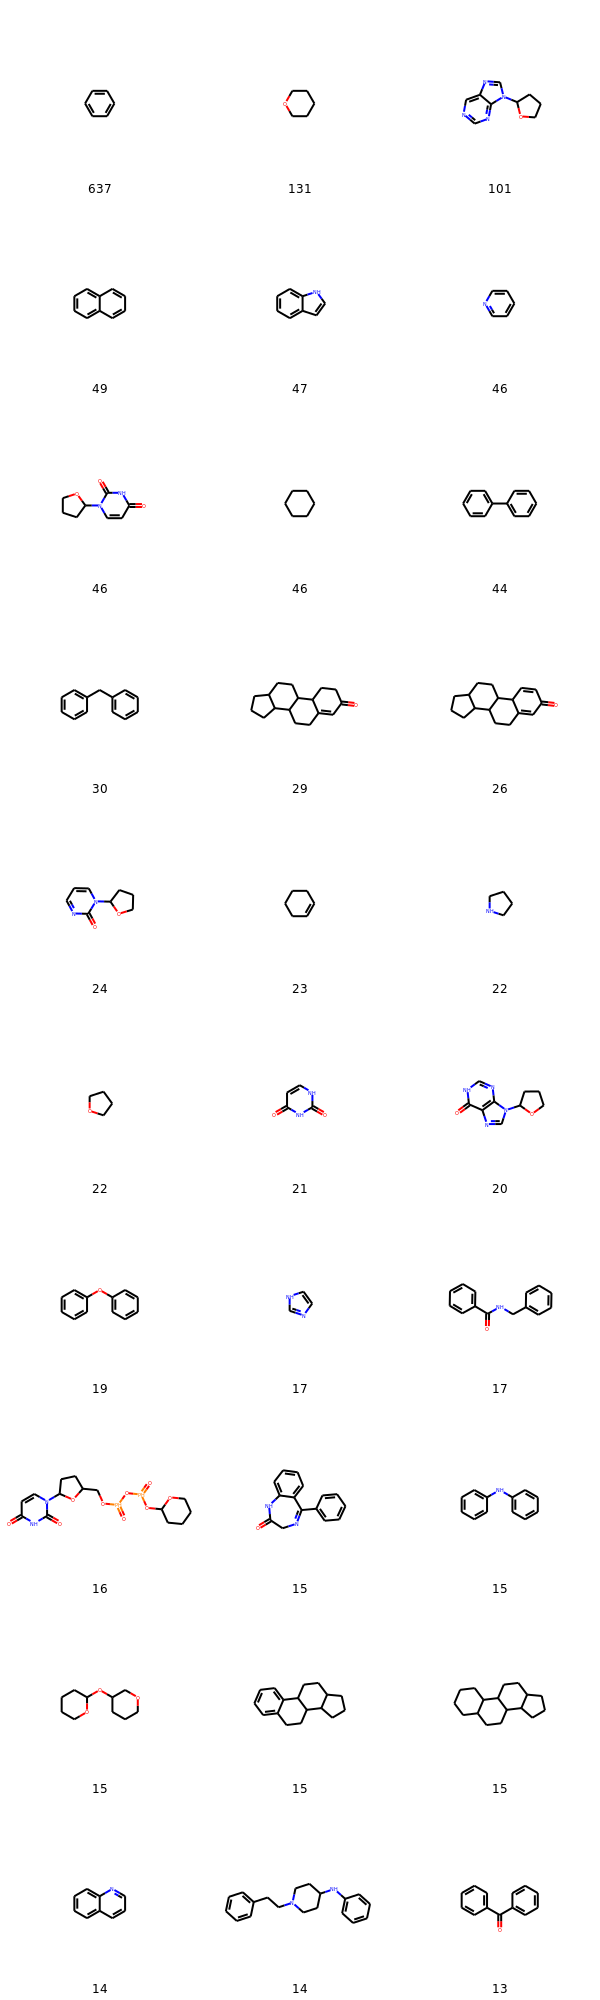

In [36]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi, count in scaffold_smiles[1:31]], 
                     legends=[str(count) for smi, count in scaffold_smiles[1:31]])

### + Nalezeni struktur (nazvu), ktere maji tento scaffold:

('c1ncc2ncn(C3CCCO3)c2n1', 101)


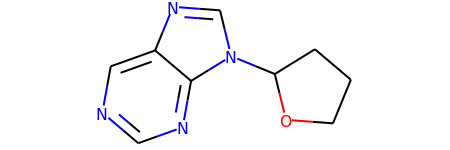

In [28]:
print(scaffold_smiles[3])
Chem.MolFromSmiles(scaffold_smiles[3][0])

In [29]:
scaffolds = [Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol)) for mol in drugbank]
scaffolds[:10]

['O=C(CNC(=O)CNC(=O)C1CCCN1C(=O)CNC(=O)CNC(=O)CNC(=O)C(Cc1ccccc1)NC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)C1CCCN1C(=O)CNC(=O)C1CCCN1C(=O)CCc1ccccc1)NCCc1ccccc1',
 'O=C(CNC(=O)CNC(=O)C(Cc1ccccc1)NC(=O)CNC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)C(Cc1cnc[nH]1)NC(=O)C1CCC(=O)N1)NCC(=O)N1CCCC1',
 'O=C1CNC(=O)C(Cc2ccccc2)NC(=O)C(Cc2ccccc2)NC(=O)CCSSCC(C(=O)N2CCCC2)NC(=O)CN1',
 'O=C(CNC(=O)CNC(=O)C(Cc1ccccc1)NC(=O)CNC(=O)C(Cc1cccnc1)NC(=O)C(Cc1ccccc1)NC(=O)CCc1ccc2ccccc2c1)NCC(=O)N1CCCC1',
 'O=C1CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CN1',
 'O=C1CNC(=O)C(Cc2ccccc2)NC(=O)C(Cc2ccccc2)NC(=O)CCSSCC(C(=O)N2CCCC2)NC(=O)CN1',
 'O=C1CNC(=O)CNC(=O)C(Cc2c[nH]c3ccccc23)NC(=O)C(Cc2ccccc2)NC(=O)C(NC(=O)CCc2ccccc2)CSSCCN1',
 'c1ccncc1',
 'O=C1CCC2CC3C4CCC5=N4~[Co]46(N3C2=CC2=N~4C(=CC3=N~6C(=C5)CC3)CC2)~n2cn(c3ccccc32)C2CC(CO2)O[PH](=O)OCCN1',
 'O=c1nc[nH]c2c1NC(CNc1ccccc1)CN2']

In [30]:
dalmatine = scaffold_smiles[3][0]
dalmatine_structure = [mol for mol, scaffold in zip(drugbank, scaffolds) if scaffold == dalmatine]
len(dalmatine_structure)

101

In [31]:
[mol.GetPropsAsDict() for mol in dalmatine_structure[1:2]] #seznam vlastnosti molekuly

[{'DATABASE_ID': 'DB00131',
  'DATABASE_NAME': 'drugbank',
  'SMILES': 'NC1=C2N=CN([C@@H]3O[C@H](COP(O)(O)=O)[C@@H](O)[C@H]3O)C2=NC=N1',
  'INCHI_IDENTIFIER': 'InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-14-5)10-7(17)6(16)4(22-10)1-21-23(18,19)20/h2-4,6-7,10,16-17H,1H2,(H2,11,12,13)(H2,18,19,20)/t4-,6-,7-,10-/m1/s1',
  'INCHI_KEY': 'UDMBCSSLTHHNCD-KQYNXXCUSA-N',
  'FORMULA': 'C10H14N5O7P',
  'MOLECULAR_WEIGHT': 347.2212,
  'EXACT_MASS': 347.063084339,
  'JCHEM_ACCEPTOR_COUNT': 10,
  'JCHEM_AVERAGE_POLARIZABILITY': 29.99861349032206,
  'JCHEM_BIOAVAILABILITY': 1,
  'JCHEM_DONOR_COUNT': 5,
  'JCHEM_FORMAL_CHARGE': 0,
  'JCHEM_GHOSE_FILTER': 0,
  'JCHEM_IUPAC': '{[(2R,3S,4R,5R)-5-(6-amino-9H-purin-9-yl)-3,4-dihydroxyoxolan-2-yl]methoxy}phosphonic acid',
  'ALOGPS_LOGP': -3.13,
  'JCHEM_LOGP': -4.788289391565842,
  'ALOGPS_LOGS': -2.02,
  'JCHEM_MDDR_LIKE_RULE': 0,
  'JCHEM_NUMBER_OF_RINGS': 3,
  'JCHEM_PHYSIOLOGICAL_CHARGE': -2,
  'JCHEM_PKA': 6.281813567799993,
  'JCHEM_PKA_STRONGEST_A

In [34]:
[mol.GetProp('GENERIC_NAME') for mol in dalmatine_structure] #vypis jmen molekul se scaffoldem s vyskytem 101x

['S-Adenosylmethionine',
 'Adenosine monophosphate',
 'Adenosine triphosphate',
 'Vidarabine',
 'Cladribine',
 'Clofarabine',
 'Adenosine',
 'Fludarabine',
 'Nelarabine',
 "Adenosine-5'-Diphosphate Monothiophosphate",
 'Methacrylyl-Coenzyme A',
 'S-Adenosyl-L-Homocysteine',
 "N-[Isoleucinyl]-N'-[Adenosyl]-Diaminosufone",
 "Adenosine-3'-5'-Diphosphate",
 'Desulfo-Coenzyme A',
 "3'-Phosphate-Adenosine-5'-Diphosphate",
 'Oxidized Coenzyme A',
 'Cordycepin Triphosphate',
 "Aspartyl-Adenosine-5'-Monophosphate",
 'Sinefungin',
 'Trifluoroacetonyl Coenzyme A',
 'Coenzyme A',
 "Adenosine-2'-5'-Diphosphate",
 '2-Chlorodideoxyadenosine',
 "5'-O-(N-Ethyl-Sulfamoyl)Adenosine",
 'Myristoyl-Coa',
 "Adenosine-5'-Ditungstate",
 "2',3'-Dideoxyadenosine-5'-Triphosphate",
 'S-(2-Oxo)Pentadecylcoa',
 "5'-Deoxy-5'-Methylthioadenosine",
 "Adenosine-5'-Rp-Alpha-Thio-Triphosphate",
 "2'-Monophosphoadenosine-5'-Diphosphate",
 'Adenosine Monotungstate',
 '5-(6-Amino-9h-Purin-9-Yl)-4-Hydroxytetrahydrofuran-3-Yl 

### Ukol 2: To same, ale genericke scaffoldy
- nutno se zbavit struktur neobsahujicich uhlik a s podezrelymi kovy
- problem: vsechny atomy nahrazuje uhlikem a ten muze byt maximalne ctyrvazny => proto je na zacatku vyhazujeme
- stale nechava atomz pripojene atomy dvojnou vazbou -> nize je toto odstraneno

In [71]:
carbon = Chem.MolFromSmarts('[#6]')
crappy_atoms = Chem.MolFromSmarts('[#26,#27,#44]') #26 = zelezo, #27 = kobalt, 44 = ruthenium, 

def is_crap(mol):
    if not mol.HasSubstructMatch(carbon):
        return True
    return mol.HasSubstructMatch(crappy_atoms)

In [72]:
drugbank = [m for m in suppl if m and not is_crap(m)]
len(drugbank)

RDKit WARNING: [16:14:03]  S group DAT ignored on line 2516
RDKit WARNING: [16:14:03]  S group DAT ignored on line 2516
RDKit WARNING: [16:14:03]  S group DAT ignored on line 2516
RDKit WARNING: [16:14:03]  S group DAT ignored on line 2516
RDKit WARNING: [16:14:04]  S group DAT ignored on line 15552
RDKit WARNING: [16:14:04]  S group DAT ignored on line 15552
RDKit WARNING: [16:14:04]  S group DAT ignored on line 15552
RDKit WARNING: [16:14:04]  S group DAT ignored on line 15552
RDKit ERROR: [16:14:04] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:14:04] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [16:14:05] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:14:05] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:14:06]  S group GEN ignored on line 102860
RDKit ERROR: [16:14:04] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:14:06]  Unhand

RDKit ERROR: [16:14:10] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [16:14:10] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:14:10] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [16:14:10] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:14:10] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [16:14:10] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [16:14:10] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [16:14:10] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [16:14:10] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [16:14:10] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [16:14:10] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [16:14:12] ERROR: Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [16:14:12] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [16:14:12] ERROR: Could not sanitize molecule ending on line 640674
RDKit ERROR: [16:14:12] ERROR: Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [16:14:12] Explicit valence for atom # 17 Mg, 4, is greater than permitted
RDKit ERROR: [16:14:12] ERROR: Could not sanitize molecule ending on line 642835
RDKit ERROR: [16:14:12] ERROR: Explicit valence for atom # 17 Mg, 4, is greater than permitted
RDKit ERROR: [16:14:12] Explicit valence for atom # 4 F, 2, is greater than permitted
RDKit ERROR: [16:14:12] ERROR: Could not sanitize molecule ending on line 645068
RDKit ERROR: [16:14:12] ERROR: Explicit valence for atom # 4 F, 2, is greater than permitted
RDKit ERROR: [16:14:12] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:14:12]

6996

In [73]:
scaffoldsGen2count = {}
for mol in drugbank:
    Chem.rdmolops.RemoveStereochemistry(mol) 
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold = MurckoScaffold.MakeScaffoldGeneric(scaffold)
    smiles = Chem.MolToSmiles(scaffold)
    scaffoldsGen2count[smiles] = scaffoldsGen2count.get(smiles, 0) + 1

In [74]:
len(scaffoldsGen2count)

2063

In [75]:
scaffoldGen_smiles = sorted(scaffoldsGen2count.items(), key=lambda x: x[1], reverse=True)

In [76]:
scaffoldGen_smiles[:10]

[('C1CCCCC1', 957),
 ('', 902),
 ('C1CCC(CC2CCCCC2)CC1', 142),
 ('C1CCCC1', 138),
 ('C1CCC2CCCC2C1', 132),
 ('C1CCC2C(C1)CCC2C1CCCC1', 130),
 ('C1CCC2CCCCC2C1', 102),
 ('C1CCC(C2CCCCC2)CC1', 85),
 ('CC1CCC2C(CCC3C4CCCC4CCC23)C1', 77),
 ('C1CCC(C2CCCC2)CC1', 60)]

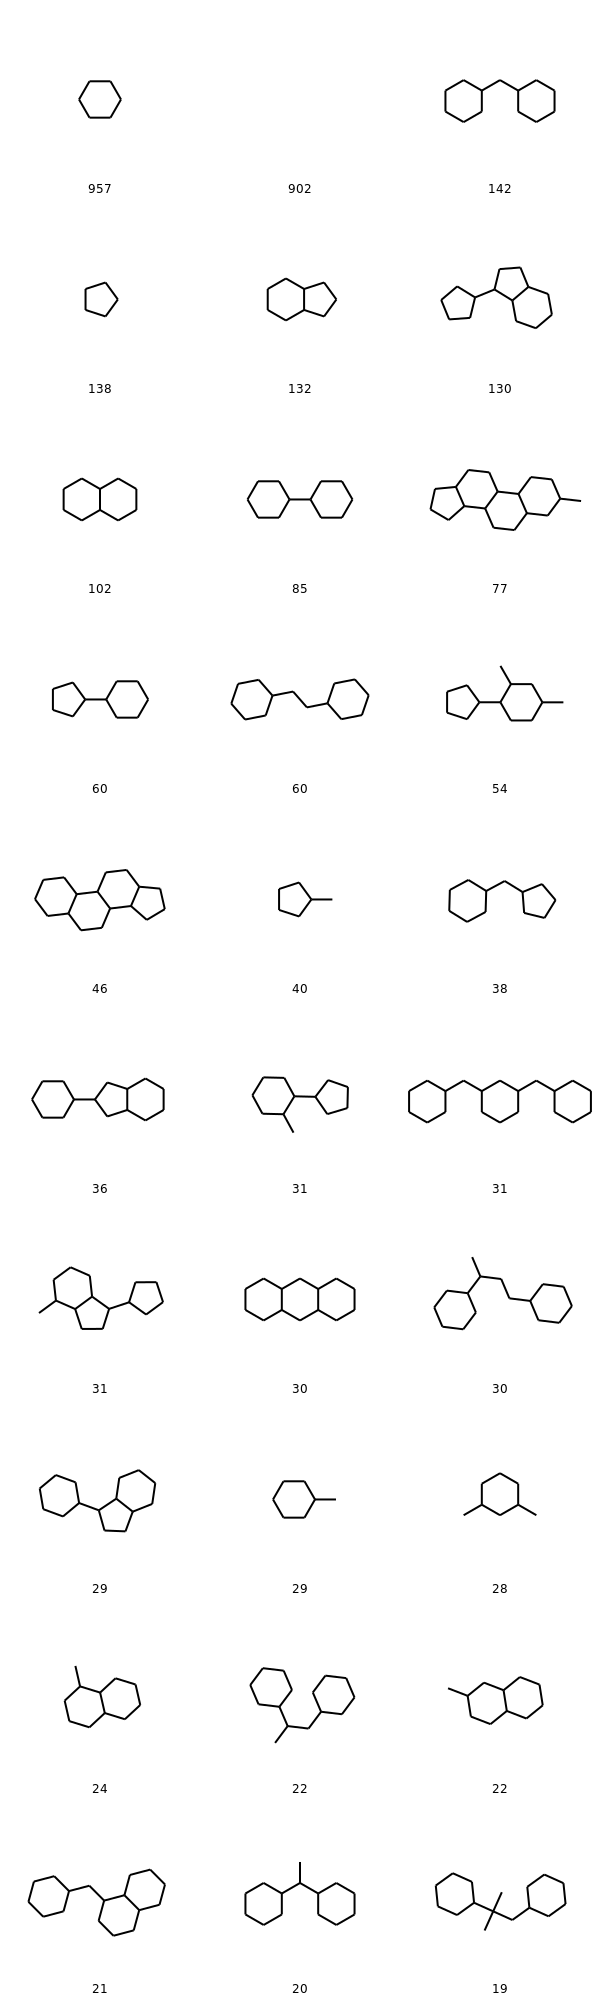

In [77]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi, count in scaffoldGen_smiles[:30]], 
                     legends=[str(count) for smi, count in scaffoldGen_smiles[:30]])

### + Odstraneni struktur, ktere maji navazane kysliky dvojnou vazbou:

In [78]:
scaffoldsGen2count2 = {}
for mol in drugbank:
    Chem.rdmolops.RemoveStereochemistry(mol) 
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold = MurckoScaffold.MakeScaffoldGeneric(scaffold)
    scaffold2 = MurckoScaffold.GetScaffoldForMol(scaffold)
    smiles = Chem.MolToSmiles(scaffold2)
    scaffoldsGen2count2[smiles] = scaffoldsGen2count2.get(smiles, 0) + 1

In [80]:
len(scaffoldsGen2count2)

1542

In [83]:
scaffoldGen_smiles2 = sorted(scaffoldsGen2count2.items(), key=lambda x: x[1], reverse=True)

In [85]:
scaffoldGen_smiles2[:10]

[('C1CCCCC1', 1038),
 ('', 902),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 188),
 ('C1CCC(CC2CCCCC2)CC1', 182),
 ('C1CCC(C2CCCC2)CC1', 176),
 ('C1CCC2CCCCC2C1', 169),
 ('C1CCC2C(C1)CCC2C1CCCC1', 166),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 151),
 ('C1CCC(CCC2CCCCC2)CC1', 106)]

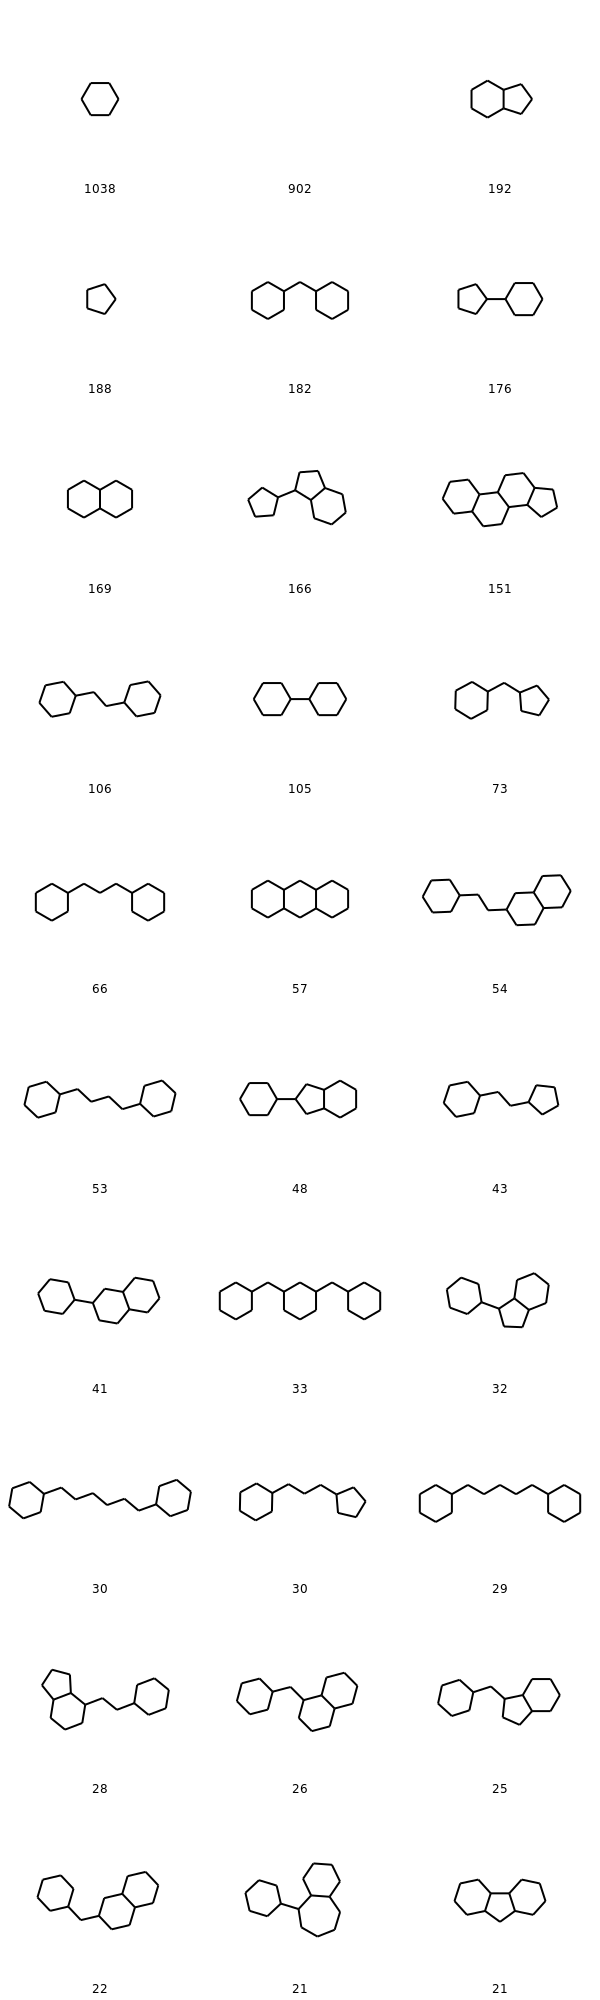

In [86]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi, count in scaffoldGen_smiles2[:30]], 
                     legends=[str(count) for smi, count in scaffoldGen_smiles2[:30]])

### Ukol 3: Kazdy scaffold rerezentovat nahodnou strukturu (kazda struktura bude mit jiny scaffold)
- kazdy framework zastoupen prave 1x

In [87]:
scaffolds2mols = {}
for mol in drugbank:
    Chem.rdmolops.RemoveStereochemistry(mol) 
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold = MurckoScaffold.MakeScaffoldGeneric(scaffold)
    smiles = Chem.MolToSmiles(scaffold)
    if smiles in scaffolds2mols:
        scaffolds2mols[smiles].append(mol)
    else:
        scaffolds2mols[smiles] = [mol]
    

In [94]:
from random import choice

picked = [choice(mols) for scaffold, mols in scaffolds2mols.items()]
picked

 ...]

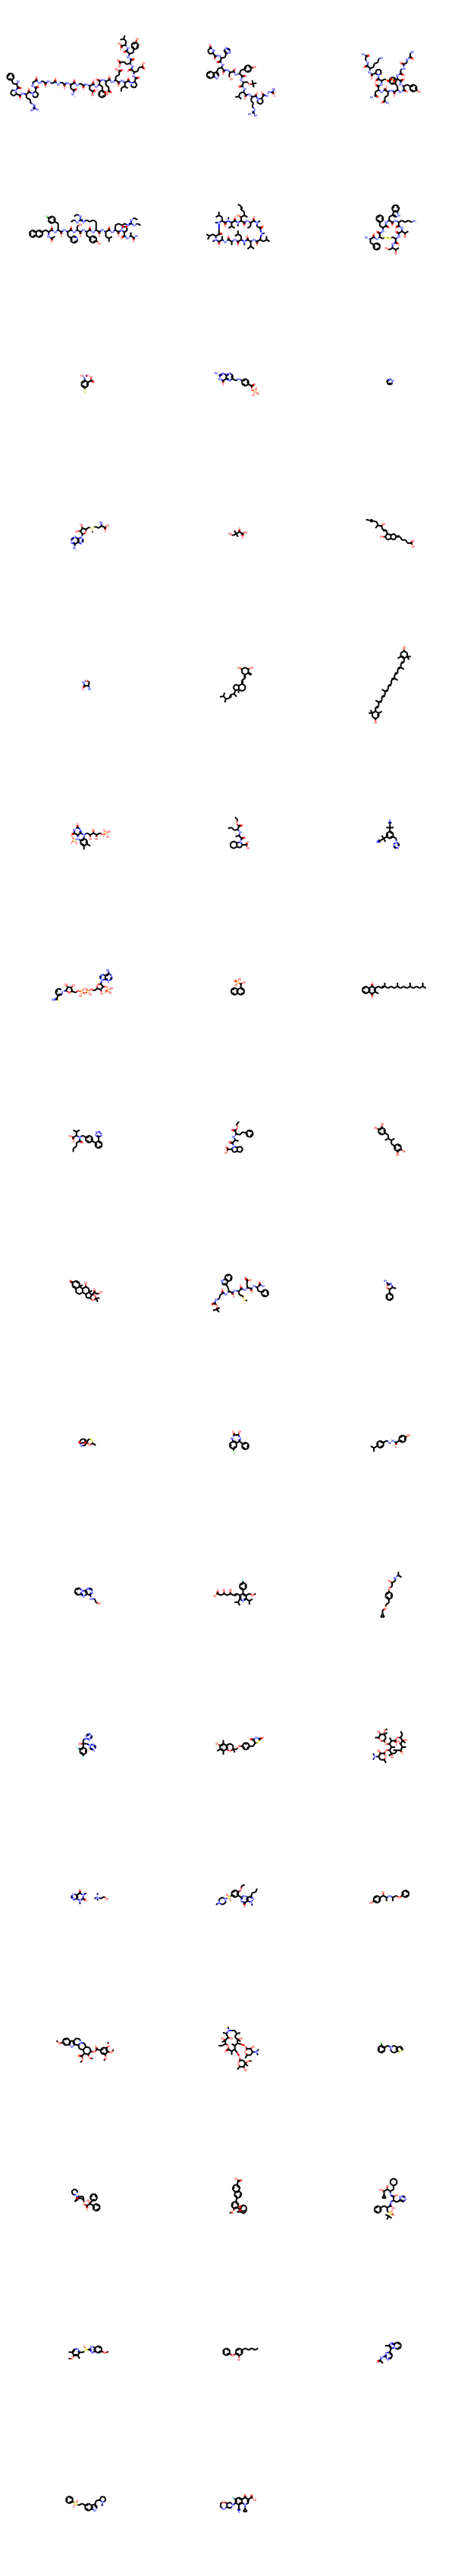

In [95]:
Draw.MolsToGridImage(picked[:90])